In [291]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import pandas_read_xml as pdx
import os
import cv2
import tensorflow as tf

In [292]:
train = 'C:/Users/19792/Desktop/Desktop/bike_helmet_detection/archive/train/images'
test = 'C:/Users/19792/Desktop/Desktop/bike_helmet_detection/archive/test/images'
test_anno = 'C:/Users/19792/Desktop/Desktop/bike_helmet_detection/archive/test/annotations/'
train_anno = 'C:/Users/19792/Desktop/Desktop/bike_helmet_detection/archive/train/annotations/'

In [293]:
def extract_xml(path):
    df2 = pd.DataFrame(columns = ['filename', 'category'])
    df = pd.DataFrame()
    for filename in os.listdir(path):
        if not filename.endswith('.xml'): continue
        fullname = os.path.join(path, filename)
        filename = filename.split(".")
        try:
            df = pdx.read_xml(fullname, ['annotation', 'object', 'name'])

            df2 = df2.append({'filename': filename[0], 'category':df[0][0]}, ignore_index=True)
            #print(filename, df)
        except:
            continue
    return df2

In [294]:
df_train = extract_xml(train_anno)
df_test = extract_xml(test_anno)

In [295]:
df_train

,filename,category
0,BikesHelmets211,With Helmet
1,BikesHelmets212,Without Helmet
2,BikesHelmets214,With Helmet
3,BikesHelmets216,Without Helmet
4,BikesHelmets218,With Helmet
...,...,...
316,BikesHelmets756,With Helmet
317,BikesHelmets761,With Helmet
318,BikesHelmets762,With Helmet
319,BikesHelmets764,With Helmet


In [296]:
df_test

,filename,category
0,BikesHelmets1,With Helmet
1,BikesHelmets10,Without Helmet
2,BikesHelmets101,With Helmet
3,BikesHelmets102,With Helmet
4,BikesHelmets103,Without Helmet
...,...,...
99,BikesHelmets90,With Helmet
100,BikesHelmets92,With Helmet
101,BikesHelmets93,Without Helmet
102,BikesHelmets94,With Helmet


In [297]:
#os.mkdir(test+ "/test_final")
#import shutil
#for filename in df_test['filename']:
#    shutil.copyfile(test +"/" + filename + ".png", test+ "/test_final/"+ filename + ".png")

In [298]:
#import shutil
#for filename in df_train['filename']:
#    shutil.copyfile(train +"/" + filename + ".png", train+ "/train_final/"+ filename + ".png")

In [299]:
def read_img(path):
    img_size = 224
    data = []
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append(resized_arr)
        except Exception as e:
            print(e)
    return np.array(data)

In [300]:
x_train = read_img(train+ "/train_final")
x_test = read_img(test + "/test_final")

In [301]:
x_train.shape

(321, 224, 224, 3)

In [302]:
x_test.shape

(104, 224, 224, 3)

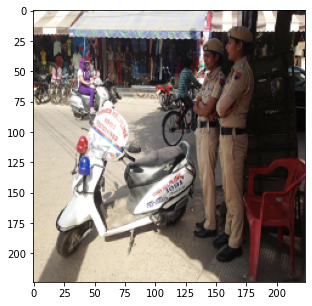

In [303]:
plt.figure(figsize = (5,5))
plt.imshow(x_train[6])

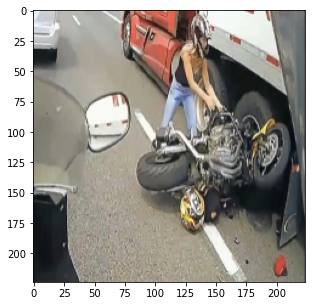

In [304]:
plt.figure(figsize = (5,5))
plt.imshow(x_test[2])

In [305]:
def class_vals(df):
    arr = []
    classes = ['With Helmet', 'Without Helmet']
    for clss in df['category']:
        arr.append(classes.index(clss))
    return np.array(arr)

In [306]:
y_train = class_vals(df_train)
y_train.shape

(321,)

In [307]:
y_test = class_vals(df_test)
y_test.shape

(104,)

In [308]:
# Normalize the data
x_train = np.array(x_train) / 255
x_train.reshape(-1, img_size, img_size, 1)

array([[[[0.78823529],
         [0.71764706],
         [0.61960784],
         ...,
         [0.7254902 ],
         [0.82745098],
         [0.80392157]],

        [[0.70588235],
         [0.80392157],
         [0.78039216],
         ...,
         [0.32941176],
         [0.31764706],
         [0.38823529]],

        [[0.34117647],
         [0.32941176],
         [0.44705882],
         ...,
         [0.85490196],
         [0.83137255],
         [0.75686275]],

        ...,

        [[0.36470588],
         [0.2       ],
         [0.45882353],
         ...,
         [0.83137255],
         [0.86666667],
         [0.90196078]],

        [[0.83137255],
         [0.81960784],
         [0.81960784],
         ...,
         [0.88627451],
         [0.98039216],
         [0.97647059]],

        [[0.97254902],
         [0.99607843],
         [0.99607843],
         ...,
         [0.36078431],
         [0.18823529],
         [0.35686275]]],


       [[[0.36470588],
         [0.23529412],
         [0.50

In [309]:
x_test = np.array(x_test) / 255
x_test.reshape(-1, img_size, img_size, 1)

array([[[[0.14117647],
         [0.15294118],
         [0.0627451 ],
         ...,
         [0.17647059],
         [0.21176471],
         [0.18039216]],

        [[0.14117647],
         [0.24705882],
         [0.21568627],
         ...,
         [0.55294118],
         [0.44313725],
         [0.59607843]],

        [[0.52156863],
         [0.41176471],
         [0.54901961],
         ...,
         [0.44705882],
         [0.40392157],
         [0.31372549]],

        ...,

        [[0.58431373],
         [0.54117647],
         [0.61568627],
         ...,
         [0.5372549 ],
         [0.50588235],
         [0.4745098 ]],

        [[0.62352941],
         [0.54117647],
         [0.42745098],
         ...,
         [0.8627451 ],
         [0.87058824],
         [0.83529412]],

        [[0.83529412],
         [0.41960784],
         [0.39215686],
         ...,
         [0.58039216],
         [0.54117647],
         [0.61176471]]],


       [[[0.57647059],
         [0.5372549 ],
         [0.61

In [310]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

#model.add(Conv2D(64, 3, padding="same", activation="relu"))
#model.add(MaxPooling2D())
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               12845184  
_________________________________________________________________
dense_14 (Dense)             (None, 2)                

In [311]:
from keras.optimizers import Adam
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [314]:
history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_test, y_test))

Train on 321 samples, validate on 104 samples
Epoch 1/20
321/321 [==============================] - 9s 28ms/step - loss: 0.6185 - accuracy: 1.0000 - val_loss: 0.5956 - val_accuracy: 1.0000
Epoch 2/20
321/321 [==============================] - 9s 28ms/step - loss: 0.6177 - accuracy: 1.0000 - val_loss: 0.5930 - val_accuracy: 1.0000
Epoch 3/20
321/321 [==============================] - 9s 28ms/step - loss: 0.6165 - accuracy: 1.0000 - val_loss: 0.5910 - val_accuracy: 1.0000
Epoch 4/20
321/321 [==============================] - 9s 29ms/step - loss: 0.6156 - accuracy: 1.0000 - val_loss: 0.5919 - val_accuracy: 1.0000
Epoch 5/20
321/321 [==============================] - 10s 31ms/step - loss: 0.6158 - accuracy: 1.0000 - val_loss: 0.5938 - val_accuracy: 1.0000
Epoch 6/20
321/321 [==============================] - 10s 32ms/step - loss: 0.6164 - accuracy: 1.0000 - val_loss: 0.5958 - val_accuracy: 1.0000
Epoch 7/20
321/321 [==============================] - 10s 30ms/step - loss: 0.6152 - accuracy:

In [315]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']